## CONTROLE CONTINUE DEAPLEARNING ANN PYTORCH

In [36]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


### I - IMPORTATION ET PRETRAITEMENT DES DONNEES 

In [59]:
# Chargement du dataset 
data = pd.read_csv('churn_data.csv')

### 1 - Information sur le dataset

In [60]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [61]:
# Informations générales sur le dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [63]:
# Vérification des statistiques sommaires du dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user,27000.0,35422.702519,20321.006678,1.0,17810.5,35749.00,53244.25,69658.0
churn,27000.0,0.413852,0.492532,0.0,0.0,0.00,1.00,1.0
age,26996.0,32.219921,9.964838,17.0,25.0,30.00,37.00,91.0
credit_score,18969.0,542.944225,61.059315,2.0,507.0,542.00,578.00,838.0
deposits,27000.0,3.341556,9.131406,0.0,0.0,0.00,1.00,65.0
withdrawal,27000.0,0.307000,1.055416,0.0,0.0,0.00,0.00,29.0
purchases_partners,27000.0,28.062519,42.219686,0.0,0.0,9.00,43.00,1067.0
purchases,27000.0,3.273481,8.953077,0.0,0.0,0.00,1.00,63.0
cc_taken,27000.0,0.073778,0.437299,0.0,0.0,0.00,0.00,29.0
cc_recommended,27000.0,92.625778,88.869343,0.0,10.0,65.00,164.00,522.0


In [64]:
# Vérification des dimensions du dataset
data.shape

(27000, 31)

### 2 - Verification du Type de colonne et des valeurs Null

In [65]:
# Identifier les colonnes
column_types = data.dtypes
print("Types de colonnes :\n", column_types)


Types de colonnes :
 user                         int64
churn                        int64
age                        float64
housing                     object
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64

In [62]:
# verification les valeurs manquantes
print(data.isnull().sum())

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

### 3 - Traitement des valeurs Null

In [67]:
data.head(20)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0
5,3120,1,32.0,R,567.0,5,3,111,5,0,...,0,0,0,0,Taurus,0,0,55.0,1.83,0
6,41406,0,21.0,na,475.0,0,0,4,0,0,...,0,0,0,0,Cancer,0,0,2.0,0.07,0
7,67679,0,24.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Leo,0,0,1.0,0.11,0
8,21269,0,28.0,R,548.0,0,0,0,0,2,...,0,0,0,0,Sagittarius,0,0,26.0,0.87,1
9,25788,0,23.0,na,658.0,1,0,87,1,0,...,0,0,0,0,Aquarius,0,0,32.0,1.07,0


### 4 - Remplacement des valeurs Null par les NaN

In [68]:
columns_to_replace = ['age','deposits','withdrawal','purchases_partners','purchases','cc_taken','waiting_4_loan','cancelled_loan','received_loan','reward_rate']
data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)

# Vérification
print(data.isnull().sum())

user                           0
churn                          0
age                            4
housing                        0
credit_score                8031
deposits                   18156
withdrawal                 22995
purchases_partners          8656
purchases                  18295
cc_taken                   25705
cc_recommended                 0
cc_disliked                    0
cc_liked                       0
cc_application_begin           0
app_downloaded                 0
web_user                       0
app_web_user                   0
ios_user                       0
android_user                   0
registered_phones              0
payment_type                   0
waiting_4_loan             26965
cancelled_loan             26492
received_loan              26509
rejected_loan                  0
zodiac_sign                    0
left_for_two_month_plus        0
left_for_one_month             0
rewards_earned              3227
reward_rate                 3599
is_referre

In [69]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,Leo,1,0,NaN,NaN,0
1,23547,0,28.0,R,486.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47.0,2.0,86.0,47.0,NaN,...,NaN,NaN,NaN,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26.0,3.0,38.0,25.0,NaN,...,NaN,NaN,NaN,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,0,Aries,1,0,1.0,0.03,0


### 5 - Remplacement des valeur NaN par la moyenne de donnees de la colonnes

In [71]:
# Imputer les NaN avec la moyenne
columns_to_replaceF = ['age','deposits','withdrawal','purchases_partners','purchases','cc_taken','waiting_4_loan','cancelled_loan','received_loan','reward_rate','credit_score','rewards_earned']
for column in columns_to_replaceF:
    data[column].fillna(data[column].mean(), inplace=True)

C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\3927753353.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


### 6- verification

In [72]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,542.944225,10.201493,2.069663,41.304405,10.153245,1.538224,...,1.0,1.0,1.0,0,Leo,1,0,29.110125,1.047283,0
1,23547,0,28.0,R,486.000000,10.201493,2.069663,1.000000,10.153245,1.538224,...,1.0,1.0,1.0,0,Leo,0,0,44.000000,1.470000,1
2,58313,0,35.0,R,561.000000,47.000000,2.000000,86.000000,47.000000,1.538224,...,1.0,1.0,1.0,0,Capricorn,1,0,65.000000,2.170000,0
3,8095,0,26.0,R,567.000000,26.000000,3.000000,38.000000,25.000000,1.538224,...,1.0,1.0,1.0,0,Capricorn,0,0,33.000000,1.100000,1
4,61353,1,27.0,na,542.944225,10.201493,2.069663,2.000000,10.153245,1.538224,...,1.0,1.0,1.0,0,Aries,1,0,1.000000,0.030000,0


### 7 - Suppression des colonnes pas importante pour une prediction en generale 

In [74]:
data.drop('user', axis=1, inplace=True)
data.drop('zodiac_sign', axis=1, inplace=True)
data.drop('app_downloaded', axis=1, inplace=True)

### 8 - Verification des Outliers

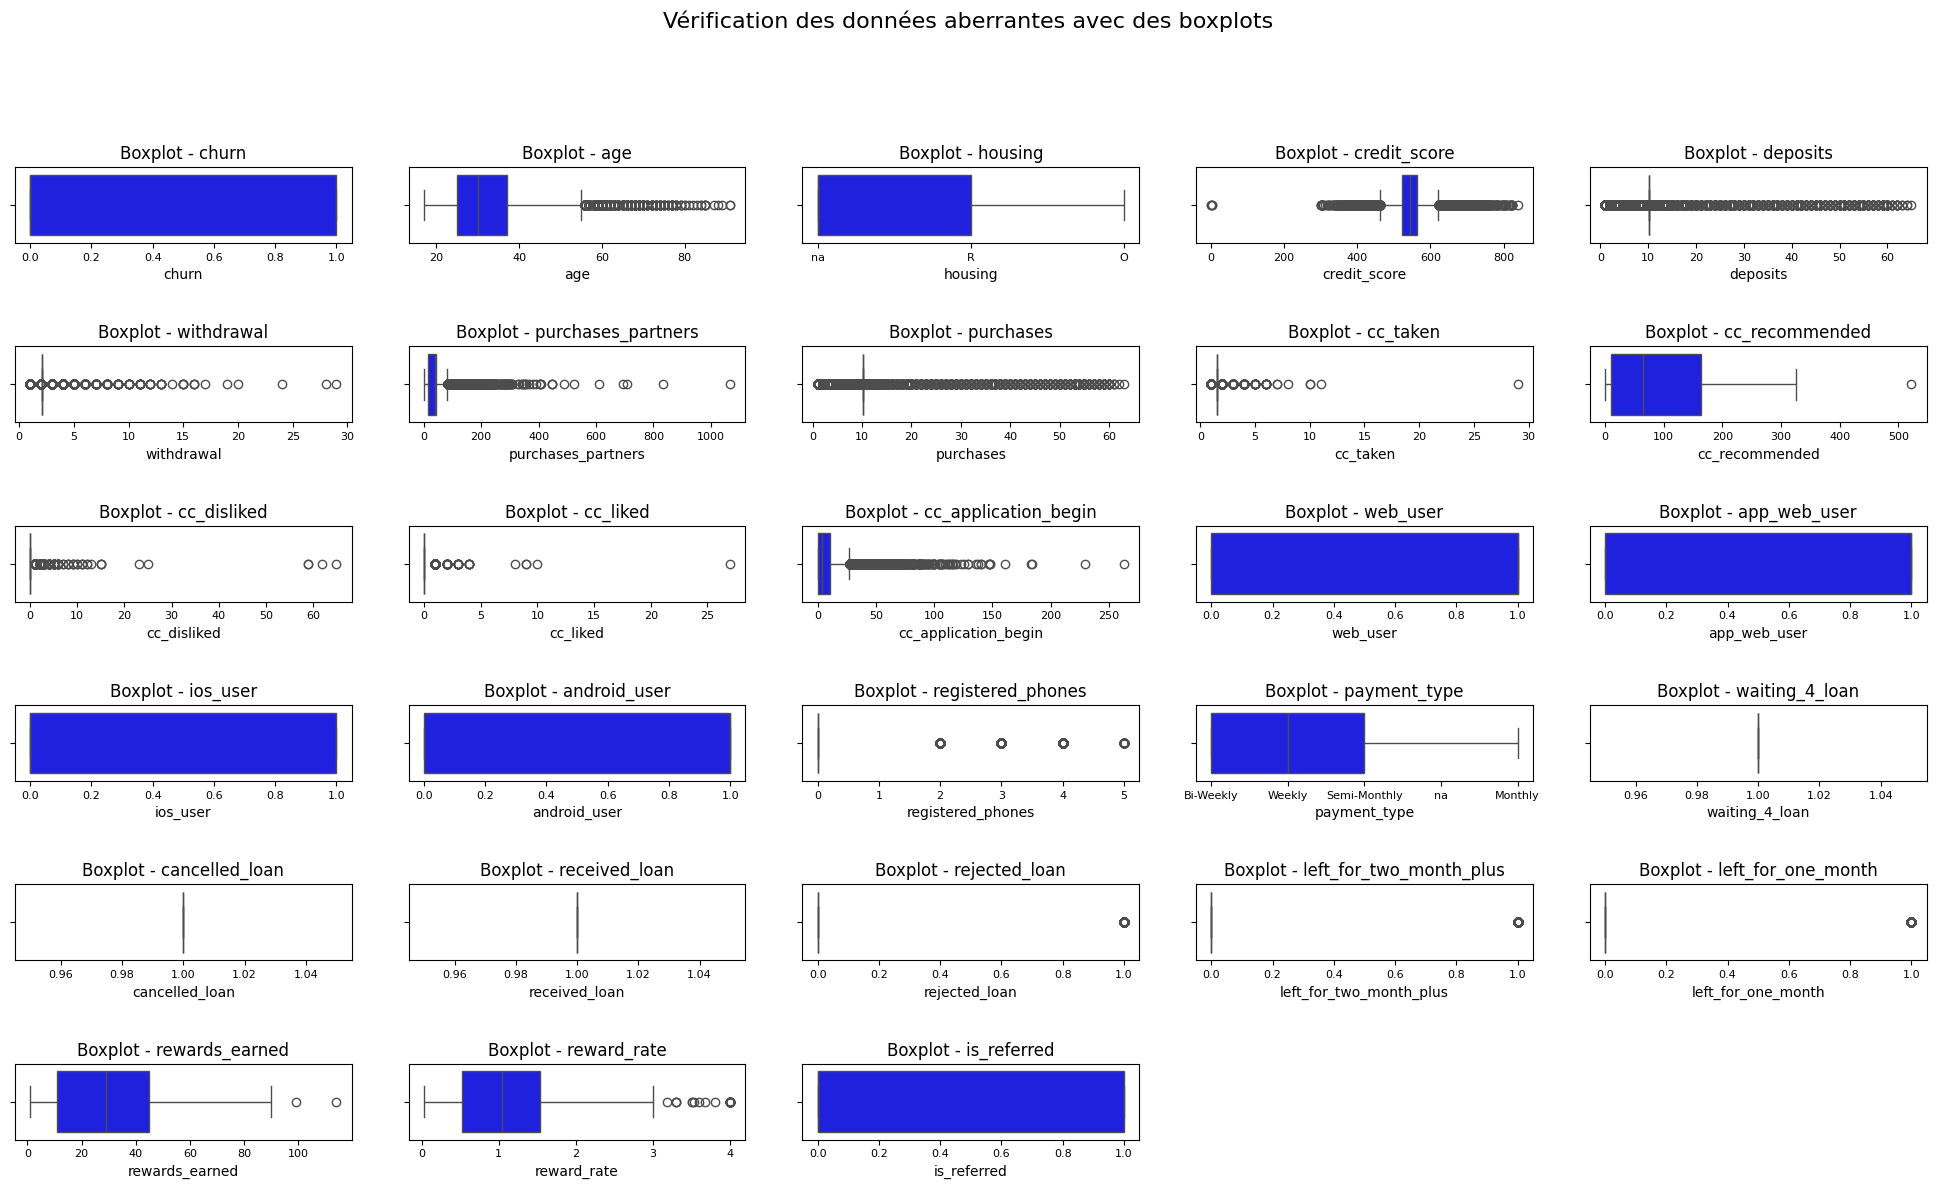

In [ ]:
# Liste des colonnes numériques (remplacez avec vos données réelles)
numeric_columns = data.columns

# Taille de la figure
plt.figure(figsize=(20, 15))

# Nombre de lignes et de colonnes pour la disposition des boxplots
n_rows = 8
n_cols = 5

# Assurez-vous que vous avez suffisamment de cases pour toutes les colonnes
# Si vous avez plus de colonnes, ajustez n_rows et n_cols
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Placer chaque boxplot dans la grille
    sns.boxplot(x=data[column], color='blue')  # Créer un boxplot pour chaque colonne
    plt.title(f"Boxplot - {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

# Ajouter un titre global
plt.suptitle("Vérification des données aberrantes avec des boxplots", y=1.02, fontsize=16)

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout(pad=3.0)

# Afficher le graphique
plt.show()


### 9 - Traitement des outliers

In [ ]:
def replace_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [76]:
data.columns

Index(['churn', 'age', 'housing', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'web_user',
       'app_web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month',
       'rewards_earned', 'reward_rate', 'is_referred'],
      dtype='object')

C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\4013788689.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\4013788689.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\4013788689.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

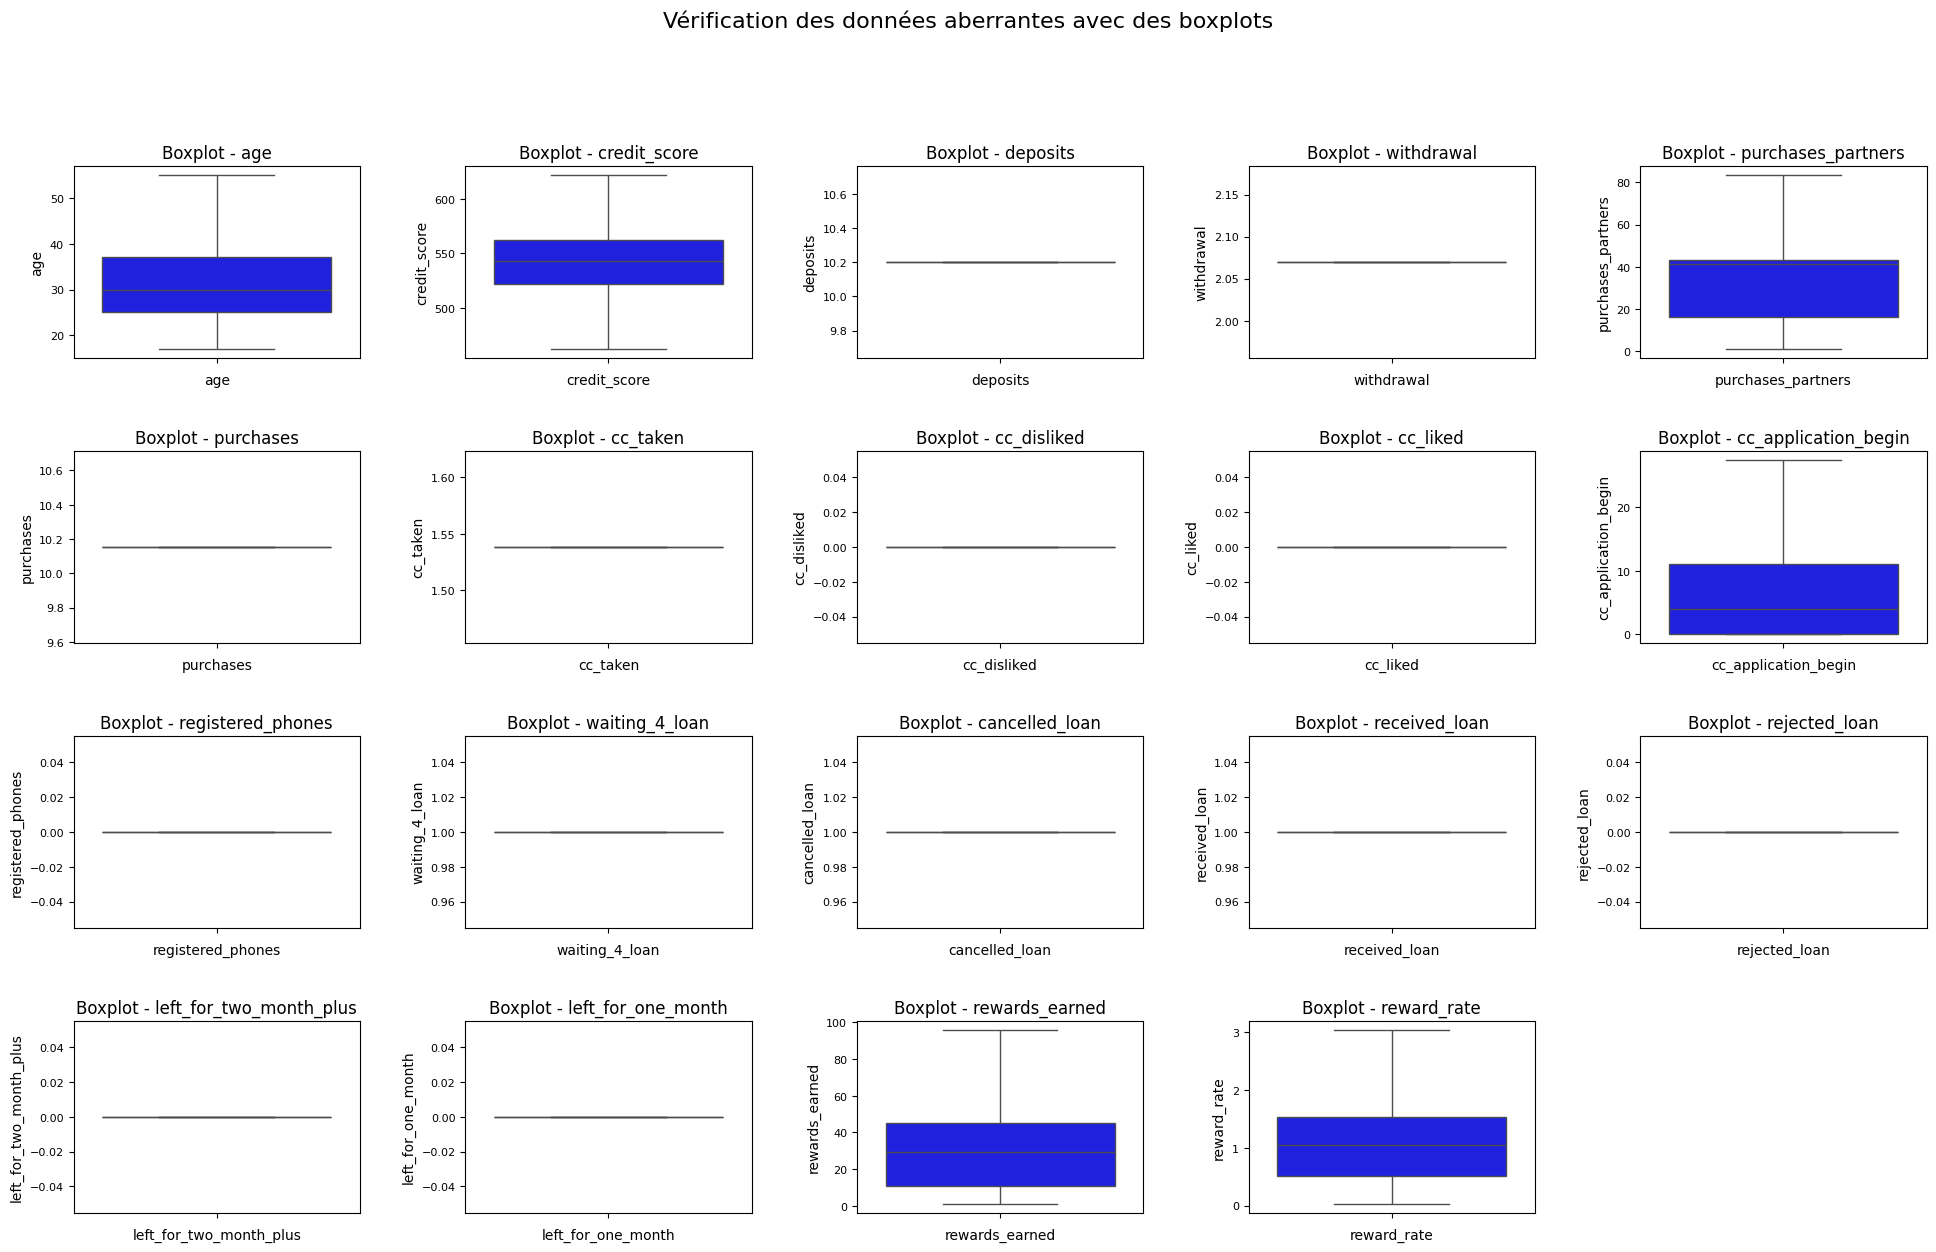

In [79]:
# Sélection des colonnes dans 'features'
features = data[['age', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month',
       'rewards_earned', 'reward_rate']]

# Remplacement des valeurs aberrantes (fonction que vous devez définir)
replace_outliers(features)

# Taille de la figure
plt.figure(figsize=(20, 15))

# Nombre de lignes et de colonnes pour la disposition des boxplots
n_rows = 5  # 5 lignes pour plus de boxplots
n_cols = 5  # 5 colonnes pour afficher plus de boxplots

# Liste des colonnes numériques à visualiser (utilisation des colonnes de 'features')
for i, column in enumerate(features.columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Placer chaque boxplot dans la grille
    sns.boxplot(data=features[column], color='blue')  # Créer un boxplot pour chaque colonne
    plt.title(f"Boxplot - {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

# Ajouter un titre global
plt.suptitle("Vérification des données aberrantes avec des boxplots", y=1.02, fontsize=16)

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout(pad=3.0)

# Afficher le graphique
plt.show()

### 10 - Encodage des donnees comme housing

In [82]:
from sklearn.preprocessing import LabelEncoder

# encodage de housing 
label_encoder = LabelEncoder()
data['housingT'] = label_encoder.fit_transform(data['housing'])
#suppression 
data.drop('housing', axis=1, inplace=True)

In [88]:
# encodage de housing 
label_encoder = LabelEncoder()
data['payment_typeT'] = label_encoder.fit_transform(data['payment_type'])
#suppression 
data.drop('payment_type', axis=1, inplace=True)

In [83]:
data.head()

,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred,housingT
0,0,37.0,542.944225,10.201493,2.069663,41.304405,10.153245,1.538224,0,0,...,1.0,1.0,1.0,0,1,0,29.110125,1.047283,0,2
1,0,28.0,486.000000,10.201493,2.069663,1.000000,10.153245,1.538224,96,0,...,1.0,1.0,1.0,0,0,0,44.000000,1.470000,1,1
2,0,35.0,561.000000,47.000000,2.000000,86.000000,47.000000,1.538224,285,0,...,1.0,1.0,1.0,0,1,0,65.000000,2.170000,0,1
3,0,26.0,567.000000,26.000000,3.000000,38.000000,25.000000,1.538224,74,0,...,1.0,1.0,1.0,0,0,0,33.000000,1.100000,1,1
4,1,27.0,542.944225,10.201493,2.069663,2.000000,10.153245,1.538224,0,0,...,1.0,1.0,1.0,0,1,0,1.000000,0.030000,0,2


## II - VISUALISATION DES DONNEES ET ACTION SUR LES FEATURES 

### 1 - Matrice de correlation 

In [89]:
data.columns

Index(['churn', 'age', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'web_user',
       'app_web_user', 'ios_user', 'android_user', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred', 'housingT', 'payment_typeT'],
      dtype='object')

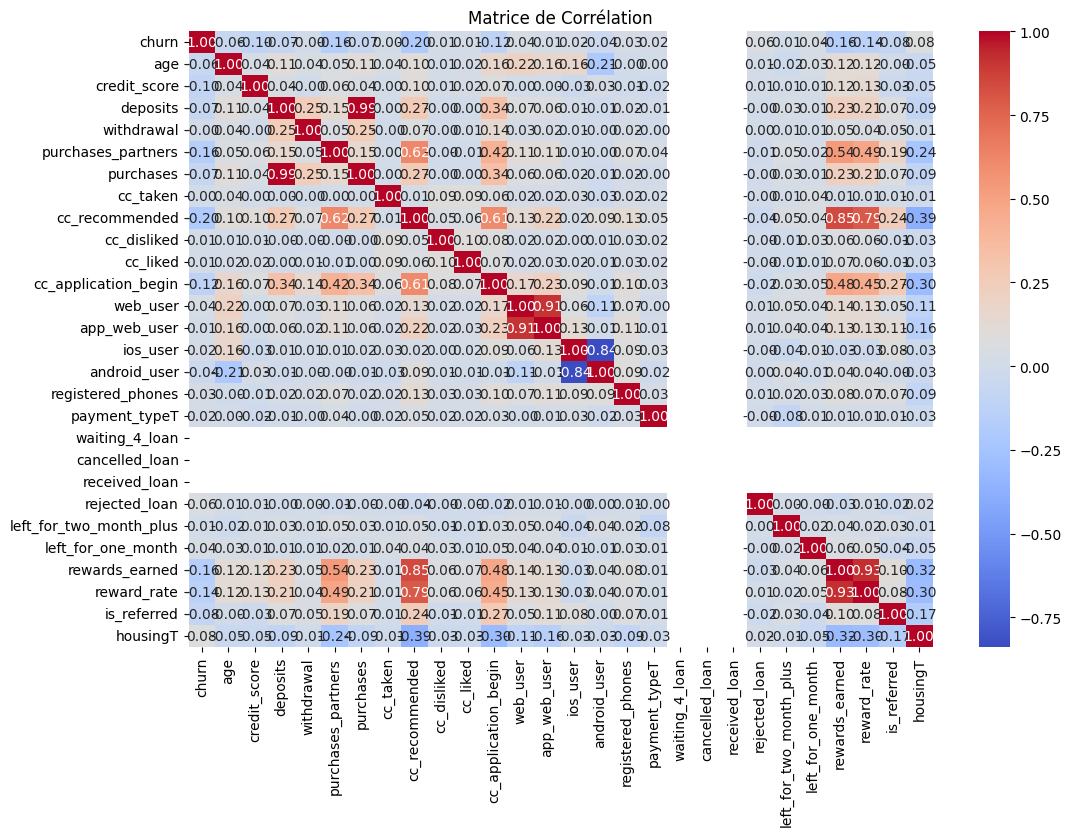

In [90]:
datacorr = data[[ 'churn', 'age', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'web_user',
       'app_web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_typeT', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month',
       'rewards_earned', 'reward_rate', 'is_referred', 'housingT']]

plt.figure(figsize=(12, 8))
corr = datacorr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

#### NB : Critères pour supprimer les colonnes :
- Corrélations très fortes (supérieures à 0.85) :
Lorsque deux colonnes sont très corrélées, elles contiennent souvent des informations redondantes. Dans ce cas, vous pouvez choisir de supprimer une des deux.
- Corrélations faibles avec la variable cible (churn) :
Si une colonne n'a qu'une corrélation très faible ou nulle avec la cible, elle est probablement peu utile pour la prédiction.
- Colonnes très peu variées (faible variance) :
Les colonnes où presque toutes les valeurs sont identiques (par exemple, 0 ou 1 pour 95 % des lignes) ne sont généralement pas informatives.
- forte correleation entre deux colonnes 

In [91]:
# Seuil de corrélation
correlation_threshold = 0.85
low_corr_threshold = 0.05

# Matrice de corrélation
correlation_matrix = data.corr()

# Identifier les paires fortement corrélées
high_corr = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            high_corr.add(colname)

# Colonnes peu corrélées avec la cible
low_corr = correlation_matrix['churn'][abs(correlation_matrix['churn']) < low_corr_threshold].index.tolist()

# Liste finale des colonnes à supprimer
columns_to_drop = list(high_corr.union(low_corr))
print("Colonnes à supprimer :", columns_to_drop)


Colonnes à supprimer : ['cc_disliked', 'registered_phones', 'cc_taken', 'ios_user', 'cc_liked', 'app_web_user', 'android_user', 'left_for_one_month', 'purchases', 'reward_rate', 'payment_typeT', 'withdrawal', 'web_user', 'left_for_two_month_plus']


In [92]:
# Supprimer les colonnes inutiles
data_cleaned = data.drop(columns=columns_to_drop)
print("Données nettoyées :", data_cleaned.shape)


Données nettoyées : (27000, 14)


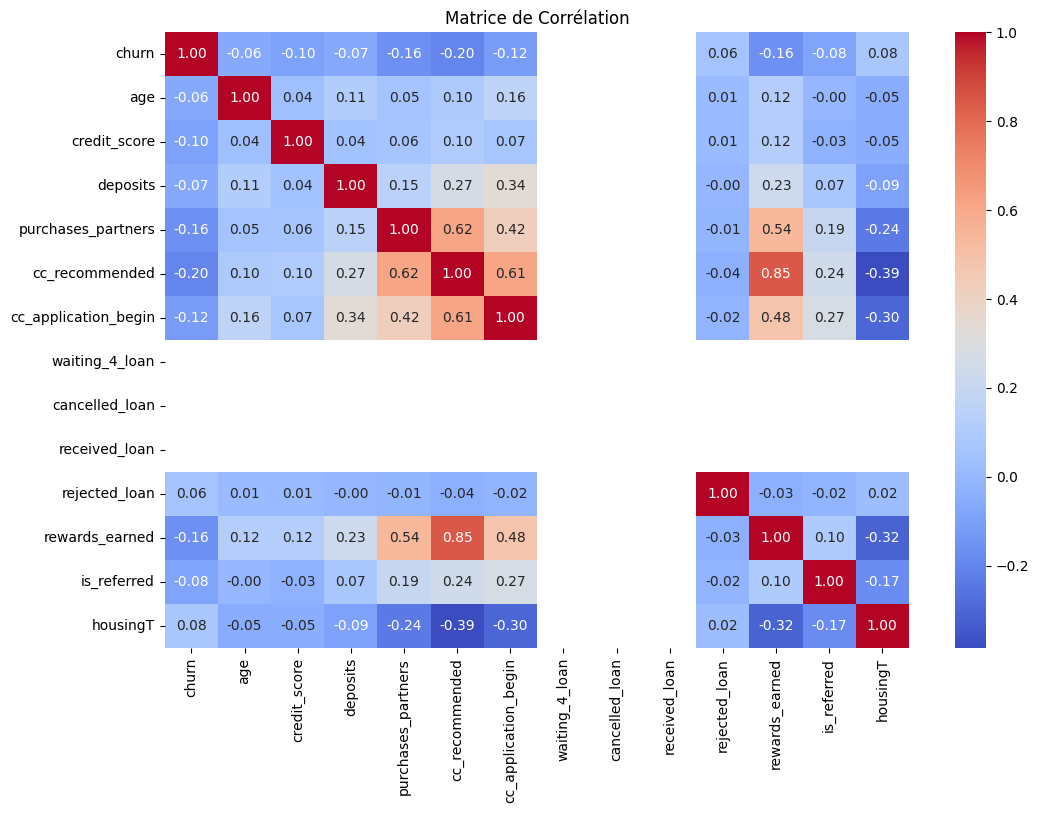

In [95]:
datacorr = data_cleaned

plt.figure(figsize=(12, 8))
corr = datacorr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

##### pour une bonnes prediction les colonnes rejected_loan, received_loan,waiting_4_loan seront supprimées 

In [97]:
data_cleaned.drop('waiting_4_loan', axis=1, inplace=True)
data_cleaned.drop('cancelled_loan', axis=1, inplace=True)
data_cleaned.drop('received_loan', axis=1, inplace=True)

#### 2- Matrice de Correlation apres nettoyage 

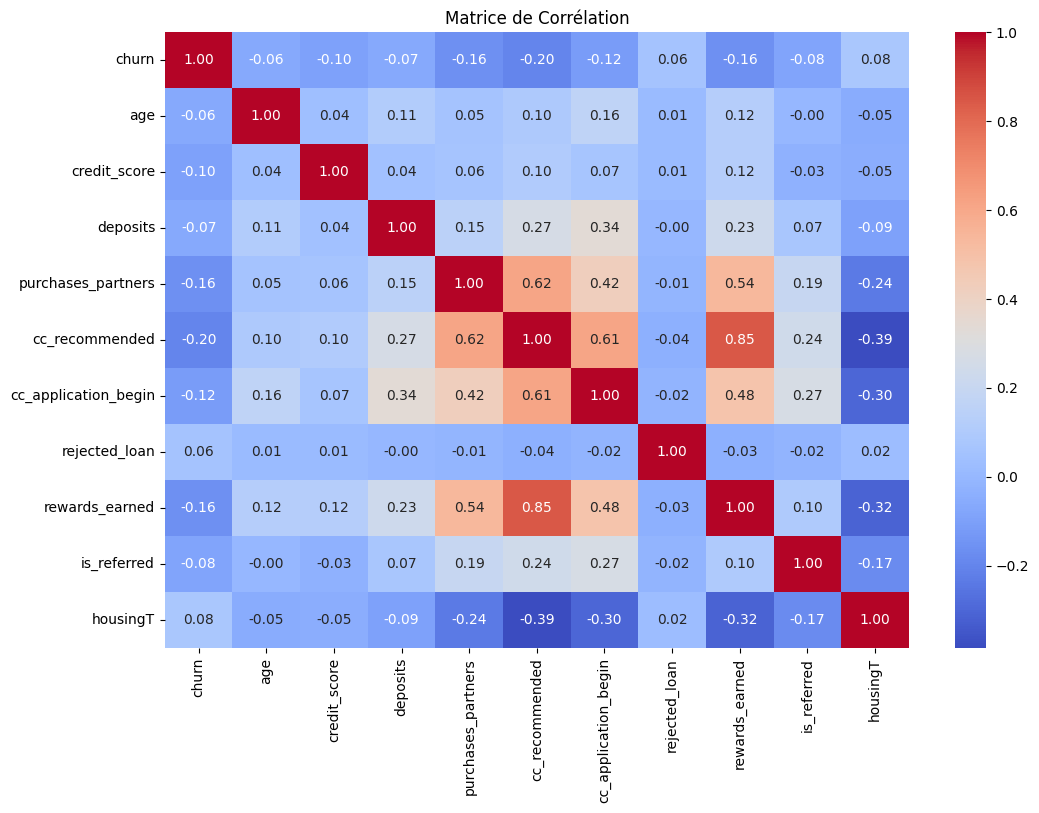

In [98]:
datacorr = data_cleaned

plt.figure(figsize=(12, 8))
corr = datacorr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

#### 3 -Quelque Graphiques de Visualisation des donnees 

##### a. Répartition des classes cibles (churn)

C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\2944167171.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=data, palette='coolwarm')


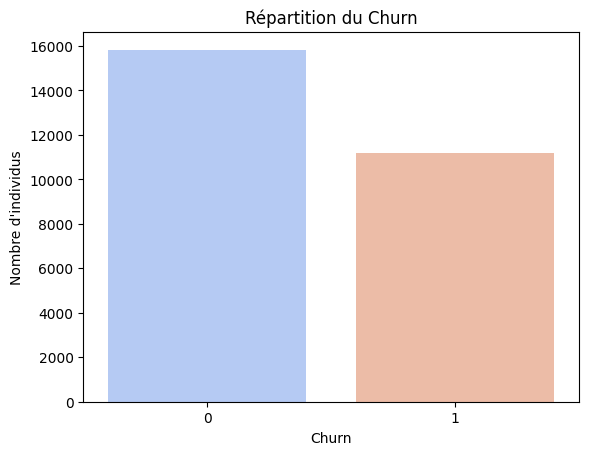

In [99]:
sns.countplot(x='churn', data=data, palette='coolwarm')
plt.title("Répartition du Churn")
plt.xlabel("Churn")
plt.ylabel("Nombre d'individus")
plt.show()


##### Interpretation : On a plus d'abonnes que de non abonnes on constate aussi un ecart considerable entre les deux choix 

##### b. Distribution de l'âge

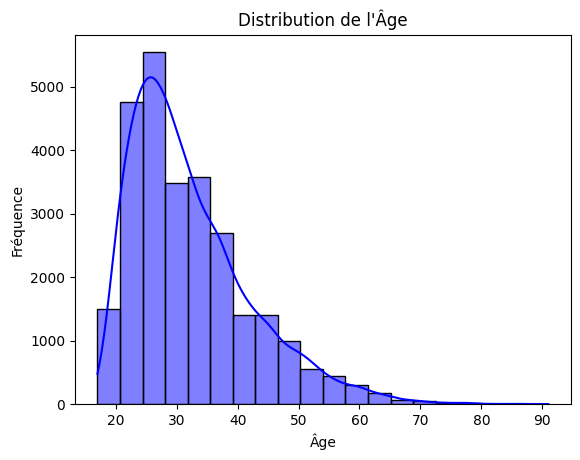

In [100]:
sns.histplot(data['age'], kde=True, bins=20, color='blue')
plt.title("Distribution de l'Âge")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()


##### ITERPRETATION : la plupart des utilisateurs sont plutot adulte entre 20ans - 30ans 

##### c.Relation entre l'âge et le score de crédit

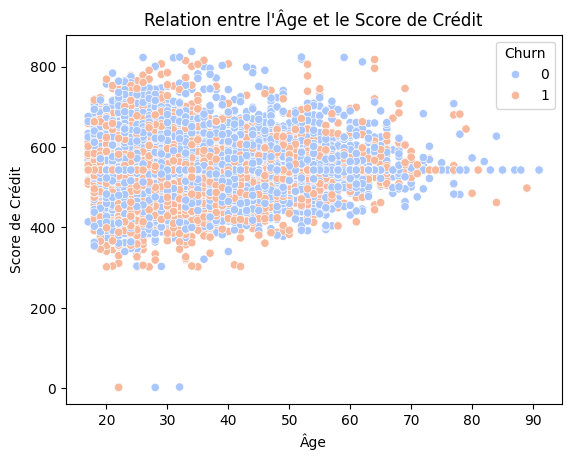

In [101]:
sns.scatterplot(x='age', y='credit_score', hue='churn', data=data, palette='coolwarm')
plt.title("Relation entre l'Âge et le Score de Crédit")
plt.xlabel("Âge")
plt.ylabel("Score de Crédit")
plt.legend(title='Churn', loc='best')
plt.show()


C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\2073638885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='deposits', data=data, ax=axes[0], palette='coolwarm')
C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\2073638885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='withdrawal', data=data, ax=axes[1], palette='coolwarm')


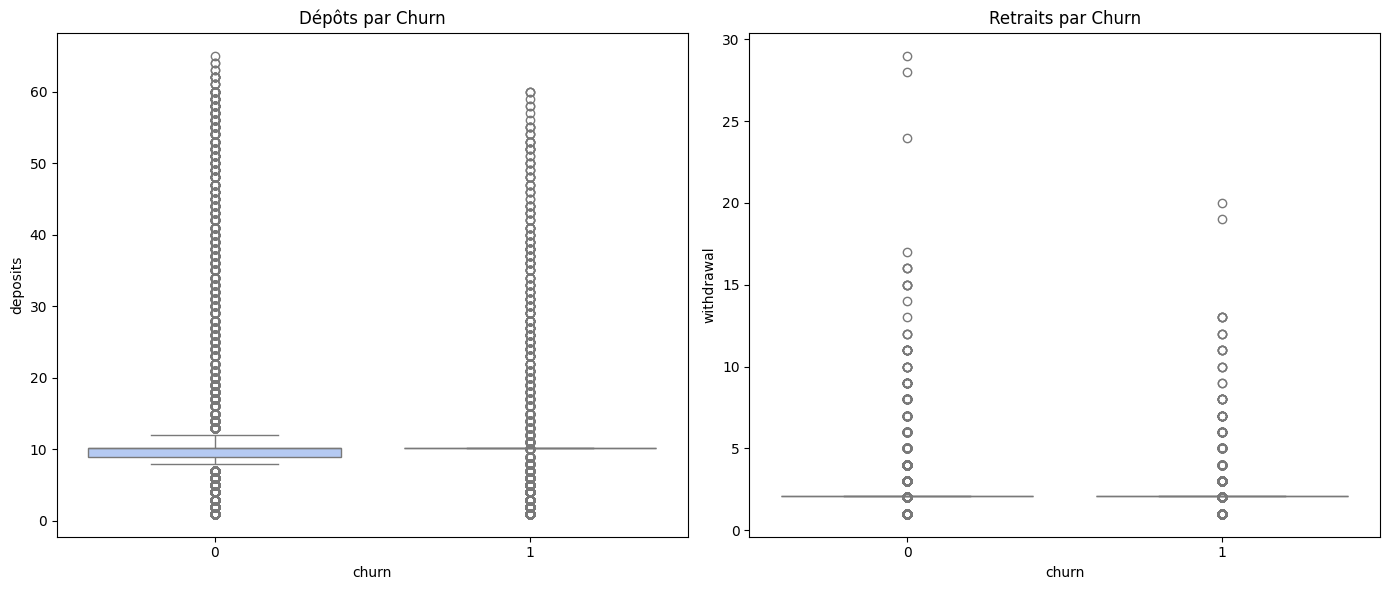

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='churn', y='deposits', data=data, ax=axes[0], palette='coolwarm')
axes[0].set_title("Dépôts par Churn")
sns.boxplot(x='churn', y='withdrawal', data=data, ax=axes[1], palette='coolwarm')
axes[1].set_title("Retraits par Churn")
plt.tight_layout()
plt.show()


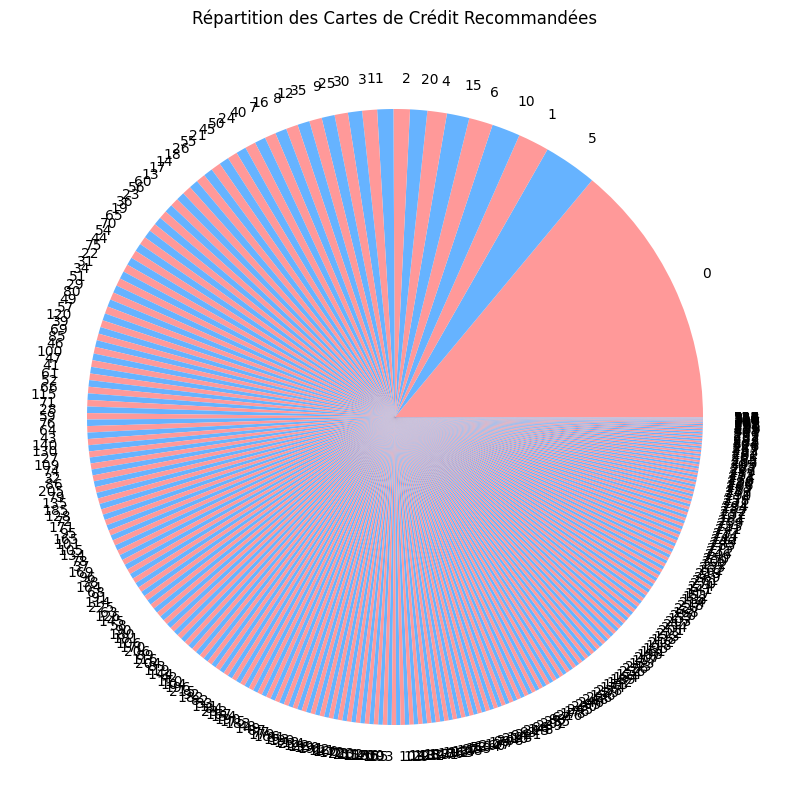

In [105]:
data['cc_recommended'].value_counts().plot.pie(autopct='', figsize=(10, 10), colors=['#ff9999','#66b3ff'])
plt.title("Répartition des Cartes de Crédit Recommandées")
plt.ylabel("")
plt.show()


##### e.Taux de récompense par churn

C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\3145090706.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='rewards_earned', data=data, palette='Set2')


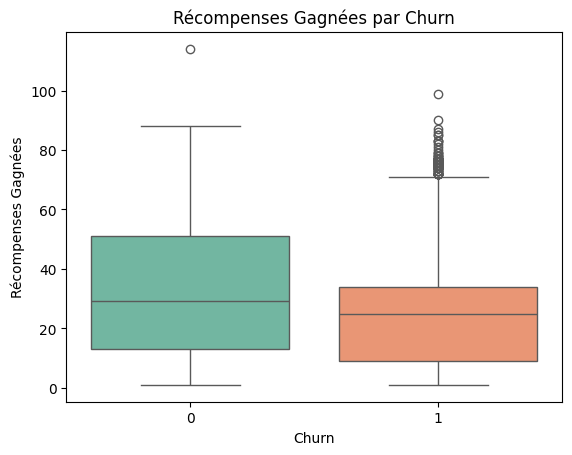

In [106]:
sns.boxplot(x='churn', y='rewards_earned', data=data, palette='Set2')
plt.title("Récompenses Gagnées par Churn")
plt.xlabel("Churn")
plt.ylabel("Récompenses Gagnées")
plt.show()


## III - STANDARTISATION ET SPLITAGE DES DONNEES 

In [107]:
data_cleaned.columns

Index(['churn', 'age', 'credit_score', 'deposits', 'purchases_partners',
       'cc_recommended', 'cc_application_begin', 'rejected_loan',
       'rewards_earned', 'is_referred', 'housingT'],
      dtype='object')

### 1- Separation X et Y et transformation en numpy array

In [110]:

X = data_cleaned.drop(['churn'],axis=1).values
y = data_cleaned['churn'].values

### 2 - splitage des données 

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18900, 10), (8100, 10), (18900,), (8100,))

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [113]:
X_train_sc

array([[-0.62147227,  0.30593151,  0.88416918, ..., -0.39584161,
        -0.68207761, -0.67617833],
       [-0.22052392, -0.02440029,  0.00454004, ...,  0.62336211,
        -0.68207761, -2.2404097 ],
       [ 0.48113568, -1.46231519,  0.00454004, ..., -0.00757353,
        -0.68207761,  0.88805305],
       ...,
       [ 0.08018734, -0.00605279,  0.00454004, ..., -1.36651182,
        -0.68207761, -0.67617833],
       [-0.32076101,  0.40308793, -0.0215302 , ..., -0.88117672,
         1.46610883, -0.67617833],
       [-0.72170935, -0.00605279,  0.00454004, ..., -1.36651182,
        -0.68207761,  0.88805305]])

### 3- Transformation en tensors

In [114]:
X_train_t = torch.tensor(X_train_sc, dtype=torch.float32)
X_test_t = torch.tensor(X_test_sc, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

In [115]:
X_train_t

tensor([[-0.6215,  0.3059,  0.8842,  ..., -0.3958, -0.6821, -0.6762],
        [-0.2205, -0.0244,  0.0045,  ...,  0.6234, -0.6821, -2.2404],
        [ 0.4811, -1.4623,  0.0045,  ..., -0.0076, -0.6821,  0.8881],
        ...,
        [ 0.0802, -0.0061,  0.0045,  ..., -1.3665, -0.6821, -0.6762],
        [-0.3208,  0.4031, -0.0215,  ..., -0.8812,  1.4661, -0.6762],
        [-0.7217, -0.0061,  0.0045,  ..., -1.3665, -0.6821,  0.8881]])

## IV - CREATION DU MODEL ET ENTRAINEMENT 

In [116]:
from torch import nn
class churn_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=X_train_t.shape[1], out_features=8)
        self.layer_2 = nn.Linear(in_features=8, out_features=8)
        self.layer_3 = nn.Linear(in_features=8, out_features=1)
        # add relU activation function
        self.relu = nn.ReLU() #  non-linear activation function
#         self.sigmoid = nn.Sigmoid() # note: usually sigmoid function is implemented here but since we will be using 
#                                             nn.BCEWithLogitsLoss(), we will apply the sigmoid fucntion to the logits
#                                             value (raw output) in the Training loops.

    def forward(self, x):
        return  self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model = churn_model()
model

cardiac_model(
  (layer_1): Linear(in_features=10, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [117]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                           lr = 0.1)

In [118]:
def accuracy_fn(y_train_t, y_pred):
    correct = torch.eq(y_train_t, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [119]:
# Build traning and evaluation loop on `model_0`

# For retrieving the epoch, train, and test accurary
epoch_count = []
train_acc_list = []
test_acc_list = []
train_loss_list = []
test_loss_list = []

# for reproductivity
torch.manual_seed(42)
epochs = 2000
for epoch in range(epochs):
    ########TRAININGI MODE########
    model.train()
    # Forward pass
    y_logits = model(X_train_t).squeeze() # convert to 1 dimension / logits is the raw prediction data
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> sigmoid function -> pred probability -> pred labels   
    # Calcualte loss/accuracy
    loss = loss_fn(y_logits, # nn.BCEWithLogitdLoss expect raw logits as input
                   y_train_t)
    acc = accuracy_fn(y_train_t,
                      y_pred)
    # Optimizer zero grad
    optimizer.zero_grad()    
    # loss backward
    loss.backward()   
    # Optimizer step
    optimizer.step()  
    ########TESTING MODE########
    model.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model(X_test_t).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # calculate the test_loss/accurary
        test_loss = loss_fn(test_logits,
                            y_test_t)
        test_acc = accuracy_fn(y_test_t,
                          test_pred)
        
        # print out what's happening every 10 epoch's
        if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_acc_list.append(acc)
            test_acc_list.append(test_acc)
            train_loss_list.append(loss)
            test_loss_list.append(test_loss)

            
            print(f'Epoch:{epoch}, | Loss:{loss:.5f} | Acc={acc:.2f}% | Test Loss:{test_loss:.5f} | Test Acc:{test_acc:.2f}')

Epoch:0, | Loss:0.72673 | Acc=41.19% | Test Loss:0.72532 | Test Acc:40.90
Epoch:100, | Loss:0.67748 | Acc=58.55% | Test Loss:0.67714 | Test Acc:58.77
Epoch:200, | Loss:0.66794 | Acc=58.55% | Test Loss:0.66758 | Test Acc:58.77
Epoch:300, | Loss:0.65274 | Acc=58.56% | Test Loss:0.65310 | Test Acc:58.77
Epoch:400, | Loss:0.64577 | Acc=59.56% | Test Loss:0.64674 | Test Acc:59.91
Epoch:500, | Loss:0.64330 | Acc=61.24% | Test Loss:0.64444 | Test Acc:61.69
Epoch:600, | Loss:0.64163 | Acc=62.01% | Test Loss:0.64281 | Test Acc:62.22
Epoch:700, | Loss:0.64022 | Acc=62.36% | Test Loss:0.64146 | Test Acc:62.17
Epoch:800, | Loss:0.63899 | Acc=62.53% | Test Loss:0.64026 | Test Acc:62.38
Epoch:900, | Loss:0.63781 | Acc=62.59% | Test Loss:0.63911 | Test Acc:62.49
Epoch:1000, | Loss:0.63654 | Acc=62.78% | Test Loss:0.63784 | Test Acc:62.73
Epoch:1100, | Loss:0.63506 | Acc=62.99% | Test Loss:0.63629 | Test Acc:63.04
Epoch:1200, | Loss:0.63329 | Acc=63.17% | Test Loss:0.63435 | Test Acc:63.42
Epoch:1300,

C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\3074989690.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  train_acc_list = np.array(torch.tensor(train_acc_list))
C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\3074989690.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  test_acc_list = np.array(torch.tensor(test_acc_list))


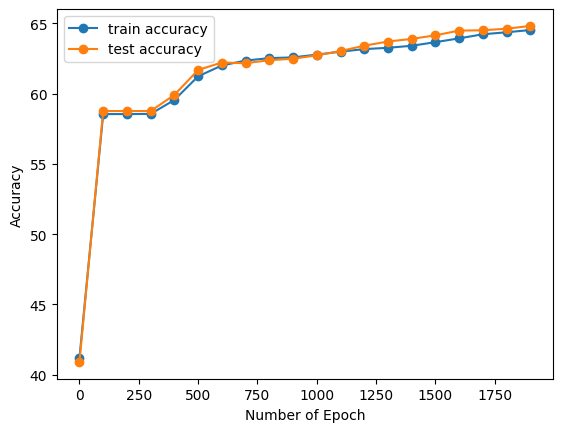

In [120]:
# revert to numpy array
train_acc_list = np.array(torch.tensor(train_acc_list))
test_acc_list = np.array(torch.tensor(test_acc_list))

plt.plot(epoch_count, train_acc_list , label = 'train accuracy', marker='o')
plt.plot(epoch_count, test_acc_list, label = 'test accuracy', marker='o')

plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.legend()

C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\3875848580.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  train_loss_list = np.array(torch.tensor(train_loss_list))
C:\Users\Elie\AppData\Local\Temp\ipykernel_24760\3875848580.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  test_loss_list = np.array(torch.tensor(test_loss_list))


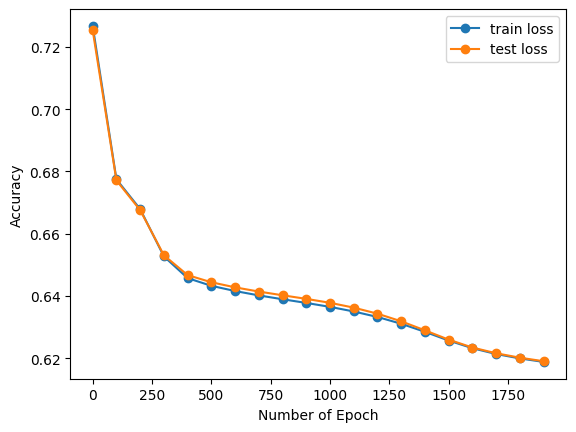

In [121]:
# revert to numpy array
train_loss_list = np.array(torch.tensor(train_loss_list))
test_loss_list = np.array(torch.tensor(test_loss_list))

plt.plot(epoch_count, train_loss_list , label = 'train loss', marker='o')
plt.plot(epoch_count, test_loss_list, label = 'test loss', marker='o')

plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.legend()

### 1 - INTERPRETATION : 

<Axes: >

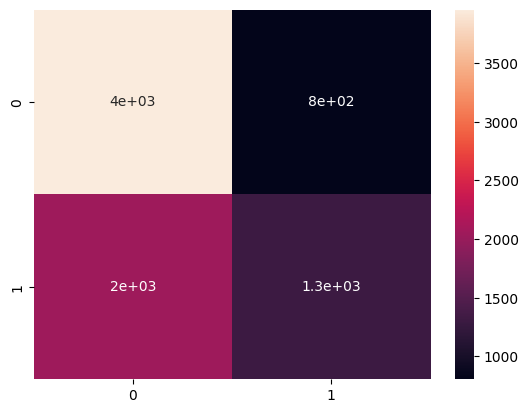

In [122]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix
model_matrix = confusion_matrix(y_test, test_pred)
sns.heatmap(model_matrix,annot=True)

<Axes: >

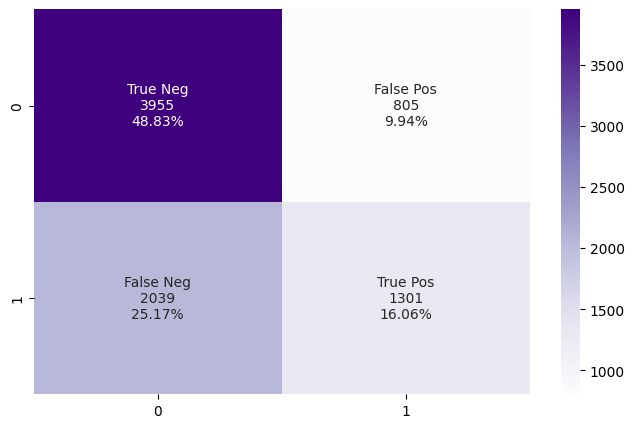

In [123]:
# Visualize
fig, ax = plt.subplots(figsize=(8,5))
# setting variables
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in model_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in model_matrix.flatten()/np.sum(model_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(model_matrix, annot=labels, fmt='', cmap='Purples')

## V - PREDICTION 

In [124]:
liste = ['churn', 'age', 'credit_score', 'deposits', 'purchases_partners',
       'cc_recommended', 'cc_application_begin', 'rejected_loan',
       'rewards_earned', 'is_referred', 'housingT']
formatted_output = ""
for i, element in enumerate(liste):
    formatted_output += element
    if i != len(liste) - 1:
        formatted_output += ", "
print(formatted_output)


churn, age, credit_score, deposits, purchases_partners, cc_recommended, cc_application_begin, rejected_loan, rewards_earned, is_referred, housingT


In [125]:
def Prediction_sample( age, credit_score, deposits, purchases_partners, cc_recommended, cc_application_begin, rejected_loan, rewards_earned, is_referred, housingT):
    sample = np.array([[ age, credit_score, deposits, purchases_partners, cc_recommended, cc_application_begin, rejected_loan, rewards_earned, is_referred, housingT]])
    sample = torch.from_numpy(sample).type(torch.float)
    model.eval()
    with torch.inference_mode():
    # forward pass
        sample_logits = model(sample).squeeze()
        sample_pred = torch.round(torch.sigmoid(sample_logits))
    
    return sample_pred

In [126]:
data_cleaned.head(2)

,churn,age,credit_score,deposits,purchases_partners,cc_recommended,cc_application_begin,rejected_loan,rewards_earned,is_referred,housingT
0,0,37.0,542.944225,10.201493,41.304405,0,0,0,29.110125,0,2
1,0,28.0,486.000000,10.201493,1.000000,96,5,0,44.000000,1,1


In [127]:
Prediction_sample(37.0,500.0,10.201493,41.304405,96,5,0,44.000000,1,3)

tensor(0.)

In [ ]:
# Définition du modèle
class CutPredictionModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 5)
        self.dropout = nn.Dropout(p=0.5)
        self.softmax = nn.Softmax(dim=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.dropout(x)
        x = self.relu(self.layer3(x))
        x = self.dropout(x)
        x = self.softmax(self.layer4(x))
        return x
